# Start

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Seq import Seq, MutableSeq
from Bio import SeqIO
from Bio.Data.CodonTable import unambiguous_dna_by_id
from Bio.SeqUtils import seq3
from Bio.SeqFeature import CompoundLocation

helix_df = pd.read_csv(r'C:\Work\Lab\pr-29-trna-or-mutagenesis\raw\HelixMTdb_20200327.tsv', sep='\t').copy()

In [12]:
helix_df

,locus,alleles,feature,gene,counts_hom,AF_hom,counts_het,AF_het,mean_ARF,max_ARF,haplogroups_for_homoplasmic_variants,haplogroups_for_heteroplasmic_variants
0,chrM:5,"[""A"",""C""]",non_coding,MT-CRb,1,0.000005,0,0.000000,NaN,NaN,"[[""H"",1]]",[]
1,chrM:10,"[""T"",""C""]",non_coding,MT-CRb,7,0.000036,1,0.000005,0.91892,0.91892,"[[""H"",7]]","[[""H"",1]]"
2,chrM:11,"[""C"",""T""]",non_coding,MT-CRb,0,0.000000,1,0.000005,0.60714,0.60714,[],"[[""H"",1]]"
3,chrM:12,"[""T"",""C""]",non_coding,MT-CRb,1,0.000005,0,0.000000,NaN,NaN,"[[""D"",1]]",[]
4,chrM:16,"[""A"",""T""]",non_coding,MT-CRb,273,0.001393,4,0.000020,0.68971,0.92188,"[[""K"",246],[""U"",12],[""H"",7],[""V"",2],[""B"",1],[""...","[[""K"",2],[""L3"",1],[""U"",1]]"
...,...,...,...,...,...,...,...,...,...,...,...,...
14319,chrM:16558,"[""G"",""A""]",non_coding,MT-CR,3,0.000015,0,0.000000,NaN,NaN,"[[""J"",3]]",[]
14320,chrM:16559,"[""A"",""G""]",non_coding,MT-CR,9,0.000046,0,0.000000,NaN,NaN,"[[""A"",3],[""K"",3],[""H"",2],[""B"",1]]",[]
14321,chrM:16562,"[""T"",""C""]",non_coding,MT-CR,0,0.000000,1,0.000005,0.85714,0.85714,[],"[[""U"",1]]"
14322,chrM:16564,"[""A"",""G""]",non_coding,MT-CR,0,0.000000,1,0.000005,0.70000,0.70000,[],"[[""H"",1]]"


In [43]:
helix_df_singleton = helix_df[helix_df[['counts_het', 'counts_hom']].sum(axis=1) == 1]
helix_df_2_001 = helix_df[(helix_df[['counts_het', 'counts_hom']].sum(axis=1) > 1) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001)]
helix_df_001_01 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.001)]
helix_df_01_1 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.001) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.01)]
helix_df_1_10 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.01) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.1)]
helix_df_10_ = helix_df[helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.1]
helix_dfs = {'singleton':helix_df_singleton, '2-0.1%':helix_df_2_001, '0.01-0.1%':helix_df_001_01, '0.1-1%':helix_df_01_1, '1-10%':helix_df_1_10, '>10%':helix_df_10_}4

# values_list = []
# for df in helix_dfs.values():
#     values_list.append(len(df))
list(map(len, helix_dfs.values()))

[3385, 6015, 3502, 1122, 265, 35]

In [119]:
# selecting rows in the df with only 12 basic substitutions in 'alleles' column
substitutions = []
for mut in helix_df.alleles.unique():
    mut_split = mut[1:-1].split(',')
    if len(mut_split) > 2:
        continue
    if len(mut_split[0])==3 and len(mut_split[-1])==3:
        substitutions.append(mut)

only_subs_helix_df = helix_df[(helix_df.alleles.isin(substitutions)) & ((helix_df.feature != 'non_coding'))] #  | (helix_df.gene.isin(['MT-CRb', 'MT-CR']))
only_subs_helix_df

,locus,alleles,feature,gene,counts_hom,AF_hom,counts_het,AF_het,mean_ARF,max_ARF,haplogroups_for_homoplasmic_variants,haplogroups_for_heteroplasmic_variants
967,chrM:577,"[""G"",""A""]",tRNA_gene,MT-TF,0,0.000000,2,0.000010,0.095351,0.095779,[],"[[""H"",1],[""T"",1]]"
968,chrM:580,"[""T"",""C""]",tRNA_gene,MT-TF,0,0.000000,1,0.000005,0.085911,0.085911,[],"[[""H"",1]]"
969,chrM:585,"[""A"",""G""]",tRNA_gene,MT-TF,0,0.000000,2,0.000010,0.104630,0.107910,[],"[[""A"",1],[""M"",1]]"
970,chrM:588,"[""T"",""C""]",tRNA_gene,MT-TF,0,0.000000,2,0.000010,0.161700,0.169930,[],"[[""H"",1],[""U"",1]]"
971,chrM:591,"[""C"",""A""]",tRNA_gene,MT-TF,1,0.000005,0,0.000000,NaN,NaN,"[[""B"",1]]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,chrM:16015,"[""T"",""C""]",tRNA_gene,MT-TP,0,0.000000,3,0.000015,0.210920,0.290320,[],"[[""J"",2],[""Y"",1]]"
13577,chrM:16017,"[""T"",""C""]",tRNA_gene,MT-TP,90,0.000459,19,0.000097,0.328900,0.796120,"[[""L1"",47],[""U"",10],[""K"",6],[""B"",4],[""A"",3],[""...","[[""H"",12],[""J"",2],[""K"",1],[""L1"",1],[""T"",1],[""U..."
13578,chrM:16018,"[""T"",""C""]",tRNA_gene,MT-TP,2,0.000010,0,0.000000,NaN,NaN,"[[""J"",2]]",[]
13579,chrM:16022,"[""T"",""C""]",tRNA_gene,MT-TP,0,0.000000,2,0.000010,0.125810,0.160000,[],"[[""K"",1],[""U"",1]]"


In [120]:
only_subs_helix_df_singleton = only_subs_helix_df[only_subs_helix_df[['counts_het', 'counts_hom']].sum(axis=1) == 1]
only_subs_helix_df_2_001 = only_subs_helix_df[(only_subs_helix_df[['counts_het', 'counts_hom']].sum(axis=1) > 1) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001)]
only_subs_helix_df_001_01 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.001)]
only_subs_helix_df_01_1 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.001) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.01)]
only_subs_helix_df_1_10 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.01) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.1)]
only_subs_helix_df_10_ = only_subs_helix_df[only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.1]
only_subs_helix_dfs = {'singleton':only_subs_helix_df_singleton, '2-0.1%':only_subs_helix_df_2_001, '0.01-0.1%':only_subs_helix_df_001_01, '0.1-1%':only_subs_helix_df_01_1, '1-10%':only_subs_helix_df_1_10, '>10%':only_subs_helix_df_10_}
list(map(len, only_subs_helix_dfs.values()))

[2749, 5131, 3039, 909, 177, 22]

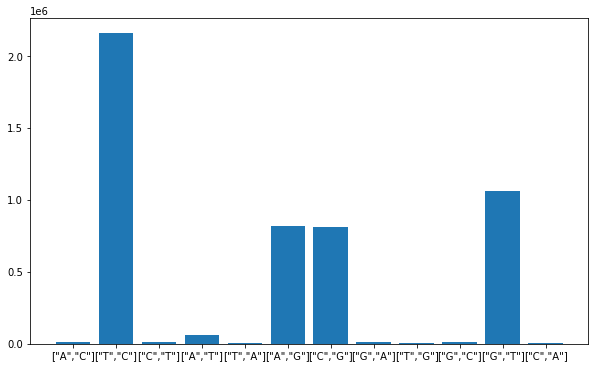

In [70]:
subs_number = only_subs_helix_df.groupby('alleles').sum(numeric_only=True).loc[:,['counts_hom', 'counts_het']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.bar(x=substitutions, height=subs_number)
plt.show()

# RefSeq

In [132]:
refseq = SeqIO.read(r"C:\Work\Lab\pr-29-trna-or-mutagenesis\raw\helixMT Reference.gb", "genbank")
rCRS_cds = []
for refseq_feature in refseq.features:
    if refseq_feature.type == 'CDS': #  ['source', 'D-loop', 'gene', 'misc_feature']
        rCRS_cds.append(refseq_feature)
rCRS_cds

[SeqFeature(FeatureLocation(ExactPosition(3306), ExactPosition(4262), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(4469), ExactPosition(5511), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(5903), ExactPosition(7445), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(7585), ExactPosition(8269), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(8365), ExactPosition(8572), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(8526), ExactPosition(9207), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(9206), ExactPosition(9990), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(10058), ExactPosition(10404), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(10469), ExactPosition(10766), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(10759), ExactPosition(12137), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(12336), Exac

In [130]:
locations_dict = {}
for refseq_feature in rCRS_cds:
    start = refseq_feature.location.nofuzzy_start
    end = refseq_feature.location.nofuzzy_end
    location_name = refseq_feature.qualifiers['gene'][0]
    locations_dict[f'{start}-{end}'] = location_name
locations_dict

{'3306-4262': 'ND1',
 '4469-5511': 'ND2',
 '5903-7445': 'COX1',
 '7585-8269': 'COX2',
 '8365-8572': 'ATP8',
 '8526-9207': 'ATP6',
 '9206-9990': 'COX3',
 '10058-10404': 'ND3',
 '10469-10766': 'ND4L',
 '10759-12137': 'ND4',
 '12336-14148': 'ND5',
 '14148-14673': 'ND6',
 '14746-15887': 'CYTB'}

In [94]:
# checking of substitutioning and reference bases match
for idx in range(len(only_subs_helix_df)):
    sub = only_subs_helix_df.iloc[idx]
    position = int(sub.locus[5:])
    initial_base = sub.alleles[2:3]
    reference_base = refseq.seq[position-1]
    if initial_base != reference_base:
        print(position, initial_base, reference_base)

In [78]:
for cds_loc in rCRS_cds:
    sequence = cds_loc.location.extract(refseq.seq)
    protein = sequence.translate(table=2, to_stop=True)
    print(cds_loc.qualifiers['gene'], len(protein), protein)
# ND2 INP

['ND1'] 318 MPMANLLLLIVPILIAMAFLMLTERKILGYMQLRKGPNVVGPYGLLQPFADAMKLFTKEPLKPATSTITLYITAPTLALTIALLLWTPLPMPNPLVNLNLGLLFILATSSLAVYSILWSGWASNSNYALIGALRAVAQTISYEVTLAIILLSTLLMSGSFNLSTLITTQEHLWLLLPSWPLAMMWFISTLAETNRTPFDLAEGESELVSGFNIEYAAGPFALFFMAEYTNIIMMNTLTTTIFLGTTYDALSPELYTTYFVTKTLLLTSLFLWIRTAYPRFRYDQLMHLLWKNFLPLTLALLMWYVSMPITISSIPPQT
['ND2'] 347 INPLAQPVIYSTIFAGTLITALSSHWFFTWVGLEMNMLAFIPVLTKKMNPRSTEAAIKYFLTQATASMILLMAILFNNMLSGQWTMTNTTNQYSSLMIMMAMAMKLGMAPFHFWVPEVTQGTPLTSGLLLLTWQKLAPISIMYQISPSLNVSLLLTLSILSIMAGSWGGLNQTQLRKILAYSSITHMGWMMAVLPYNPNMTILNLTIYIILTTTAFLLLNLNSSTTTLLLSRTWNKLTWLTPLIPSTLLSLGGLPPLTGFLPKWAIIEEFTKNNSLIIPTIMATITLLNLYFYLRLIYSTSITLLPMSNNVKMKWQFEHTKPTPFLPTLIALTTLLLPISPFMLMIL
['COX1'] 513 MFADRWLFSTNHKDIGTLYLLFGAWAGVLGTALSLLIRAELGQPGNLLGNDHIYNVIVTAHAFVMIFFMVMPIMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSLLLLLASAMVEAGAGTGWTVYPPLAGNYSHPGASVDLTIFSLHLAGVSSILGAINFITTIINMKPPAMTQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPILYQHLFWFFGHPEVYILILPGFGMISHIVTYYSGKKEPFGYMGMVWAMMSIGFLGFIVWAHHMFTVG

In [121]:
cds_subs_helix_df = only_subs_helix_df.loc[only_subs_helix_df.feature=='protein_coding_gene']
cds_subs_helix_df

,locus,alleles,feature,gene,counts_hom,AF_hom,counts_het,AF_het,mean_ARF,max_ARF,haplogroups_for_homoplasmic_variants,haplogroups_for_heteroplasmic_variants
2799,chrM:3307,"[""A"",""C""]",protein_coding_gene,MT-ND1,1,0.000005,0,0.000000,NaN,NaN,"[[""C"",1]]",[]
2800,chrM:3307,"[""A"",""G""]",protein_coding_gene,MT-ND1,1,0.000005,2,0.000010,0.27253,0.31429,"[[""H"",1]]","[[""U"",2]]"
2801,chrM:3308,"[""T"",""C""]",protein_coding_gene,MT-ND1,1126,0.005745,26,0.000133,0.50148,0.94643,"[[""L1"",850],[""A"",92],[""K"",51],[""L2"",38],[""H"",2...","[[""H"",8],[""A"",4],[""T"",3],[""J"",2],[""L1"",2],[""U""..."
2802,chrM:3308,"[""T"",""G""]",protein_coding_gene,MT-ND1,89,0.000454,0,0.000000,NaN,NaN,"[[""T"",89]]",[]
2803,chrM:3309,"[""A"",""G""]",protein_coding_gene,MT-ND1,1,0.000005,0,0.000000,NaN,NaN,"[[""K"",1]]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
13443,chrM:15885,"[""C"",""A""]",protein_coding_gene,MT-CYB,1,0.000005,0,0.000000,NaN,NaN,"[[""V"",1]]",[]
13444,chrM:15885,"[""C"",""T""]",protein_coding_gene,MT-CYB,126,0.000643,2,0.000010,0.29366,0.40550,"[[""H"",102],[""B"",13],[""R"",7],[""U"",2],[""X"",1],[""...","[[""K"",1],[""N"",1]]"
13445,chrM:15886,"[""C"",""A""]",protein_coding_gene,MT-CYB,1,0.000005,0,0.000000,NaN,NaN,"[[""H"",1]]",[]
13446,chrM:15886,"[""C"",""T""]",protein_coding_gene,MT-CYB,37,0.000189,3,0.000015,0.52856,0.61940,"[[""H"",11],[""M"",6],[""L1"",5],[""R"",4],[""C"",3],[""K...","[[""H"",1],[""U"",1],[""V"",1]]"


In [167]:
syn_subs_ids = []
for cds in rCRS_cds:
    start = cds.location.start
    end = cds.location.end
    gene_df = cds_subs_helix_df.loc[(cds_subs_helix_df.locus.str[5:] > str(start)) & (cds_subs_helix_df.locus.str[5:] < str(end))]
    sequence = refseq.seq[start-1:end-1]
    protein = sequence.translate(table=2, to_stop=True)
    # print(start, end)
    # print(gene_df.gene.unique())
    for idx in range(len(gene_df)):
        sub = gene_df.iloc[idx]
        position = int(sub.locus[5:])
        mut_sequence = MutableSeq(refseq.seq)
        mut_sequence[position-1] = sub.alleles[6:7]
        mut_sequence = mut_sequence[start-1:end-1]
        mut_protein = mut_sequence.translate(table=2, to_stop=True)
        if protein == mut_protein:
            syn_subs_ids.append(sub.name)
len(syn_subs_ids)

c:\Soft\Python\lib\site-packages\Bio\Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


8964

In [170]:
only_syn_helix_df = cds_subs_helix_df.loc[syn_subs_ids]
only_syn_helix_df

,locus,alleles,feature,gene,counts_hom,AF_hom,counts_het,AF_het,mean_ARF,max_ARF,haplogroups_for_homoplasmic_variants,haplogroups_for_heteroplasmic_variants
2801,chrM:3308,"[""T"",""C""]",protein_coding_gene,MT-ND1,1126,0.005745,26,0.000133,0.50148,0.94643,"[[""L1"",850],[""A"",92],[""K"",51],[""L2"",38],[""H"",2...","[[""H"",8],[""A"",4],[""T"",3],[""J"",2],[""L1"",2],[""U""..."
2807,chrM:3311,"[""C"",""T""]",protein_coding_gene,MT-ND1,21,0.000107,2,0.000010,0.49912,0.76699,"[[""HV"",12],[""A"",8],[""L3"",1]]","[[""H"",1],[""L2"",1]]"
2811,chrM:3317,"[""C"",""G""]",protein_coding_gene,MT-ND1,2,0.000010,0,0.000000,NaN,NaN,"[[""H"",2]]",[]
2812,chrM:3317,"[""C"",""T""]",protein_coding_gene,MT-ND1,6,0.000031,4,0.000020,0.16558,0.25714,"[[""M"",2],[""B"",1],[""J"",1],[""L1"",1],[""T"",1]]","[[""H"",1],[""I"",1],[""T"",1],[""U"",1]]"
2816,chrM:3320,"[""A"",""G""]",protein_coding_gene,MT-ND1,14,0.000071,1,0.000005,0.10811,0.10811,"[[""C"",9],[""B"",2],[""R"",2],[""F"",1]]","[[""U"",1]]"
...,...,...,...,...,...,...,...,...,...,...,...,...
13442,chrM:15884,"[""G"",""T""]",protein_coding_gene,MT-CYB,3,0.000015,1,0.000005,0.16154,0.16154,"[[""M"",3]]","[[""A"",1]]"
13443,chrM:15885,"[""C"",""A""]",protein_coding_gene,MT-CYB,1,0.000005,0,0.000000,NaN,NaN,"[[""V"",1]]",[]
13444,chrM:15885,"[""C"",""T""]",protein_coding_gene,MT-CYB,126,0.000643,2,0.000010,0.29366,0.40550,"[[""H"",102],[""B"",13],[""R"",7],[""U"",2],[""X"",1],[""...","[[""K"",1],[""N"",1]]"
13445,chrM:15886,"[""C"",""A""]",protein_coding_gene,MT-CYB,1,0.000005,0,0.000000,NaN,NaN,"[[""H"",1]]",[]


In [171]:
only_syn_helix_df_singleton = only_syn_helix_df[only_syn_helix_df[['counts_het', 'counts_hom']].sum(axis=1) == 1]
only_syn_helix_df_2_001 = only_syn_helix_df[(only_syn_helix_df[['counts_het', 'counts_hom']].sum(axis=1) > 1) & (only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001)]
only_syn_helix_df_001_01 = only_syn_helix_df[(only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001) & (only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.001)]
only_syn_helix_df_01_1 = only_syn_helix_df[(only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.001) & (only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.01)]
only_syn_helix_df_1_10 = only_syn_helix_df[(only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.01) & (only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.1)]
only_syn_helix_df_10_ = only_syn_helix_df[only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.1]
only_syn_helix_dfs = {'singleton':only_syn_helix_df_singleton, '2-0.1%':only_syn_helix_df_2_001, '0.01-0.1%':only_syn_helix_df_001_01, '0.1-1%':only_syn_helix_df_01_1, '1-10%':only_syn_helix_df_1_10, '>10%':only_syn_helix_df_10_}
list(map(len, only_syn_helix_dfs.values())) 

[1851, 3806, 2439, 717, 137, 14]

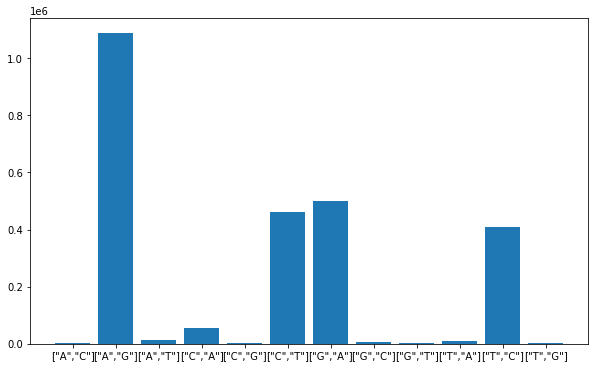

In [178]:
subs_number = only_syn_helix_df.groupby('alleles').sum(numeric_only=True).loc[:,['counts_hom', 'counts_het']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.bar(x=substitutions, height=subs_number)
plt.show()

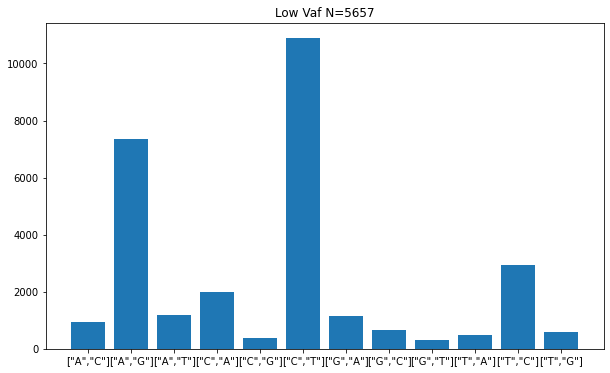

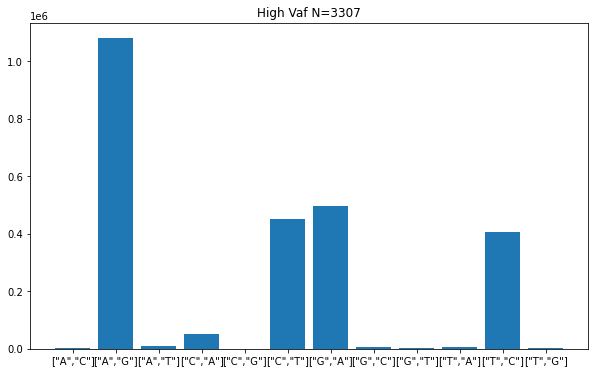

In [185]:
only_syn_helix_df_singleton = only_syn_helix_df[only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001]
subs_number = only_syn_helix_df_singleton.groupby('alleles').sum(numeric_only=True).loc[:,['counts_hom', 'counts_het']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.bar(x=substitutions, height=subs_number)
plt.title(f'Low Vaf N={len(only_syn_helix_df_singleton)}')
plt.show()
only_syn_helix_df_01_ = only_syn_helix_df[only_syn_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001]
subs_number = only_syn_helix_df_01_.groupby('alleles').sum(numeric_only=True).loc[:,['counts_hom', 'counts_het']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.bar(x=substitutions, height=subs_number)
plt.title(f'High Vaf N={len(only_syn_helix_df_01_)}')
plt.show()